<a href="https://colab.research.google.com/github/VinayakDubey07/Deep-Learning-Concepts/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)
keras.__version__

2.12.0


'2.12.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
print(fashion_mnist)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [6]:
X_train_full.shape


(60000, 28, 28)

In [7]:
X_train_full.dtype


dtype('uint8')

In [8]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

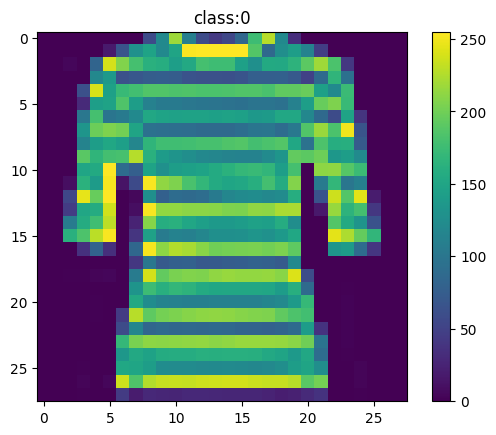

In [9]:
plt.figure
plt.imshow(X_train_full[26])
plt.colorbar()
plt.grid(False)
plt.title('class:{}'.format(y_train_full[26]))
plt.show()

In [10]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255
print(X_valid)
print(X_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]


In [13]:
class_names[y_train[2]]

'sneaker'

In [14]:
X_valid.shape

(5000, 28, 28)

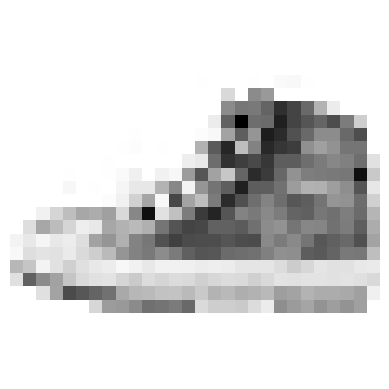

'sneaker'

In [15]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[2]]

In [16]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7068 - accuracy: 0.7636 - val_loss: 0.5124 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4873 - accuracy: 0.8303 - val_loss: 0.4500 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4446 - accuracy: 0.8447 - val_loss: 0.4160 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4180 - accuracy: 0.8537 - val_loss: 0.3981 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3974 - accuracy: 0.8601 - val_loss: 0.3879 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3818 - accuracy: 0.8662 - val_loss: 0.3885 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3681 - accuracy: 0.8694 - val_loss: 0.3654 - val_accura

In [20]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [21]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8796


[0.3335460424423218, 0.8795999884605408]

In [24]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])   #concatenate inputs
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 28, 30)       870         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 28, 30)       930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [ ]:
model.compile(loss="mean_squared_error",optimizer = keras.optimizers.SGD(lr=le-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

In [27]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
input_A

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'wide_input')>

In [ ]:
model.compile(optimizer=, loss=..., metrics=...) 

In [32]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A ,  X_new_B = X_test_A[:3], X_test_B[:3]


history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

RuntimeError: ignored